In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = 'banks_test.json'

In [3]:
df = pd.read_json(file_name)
df.head()

,mark,text,url
0,5.0,"\n\t\t\t\t\t\t\tСтавлю оценку отлично, так как...",https://www.banki.ru/services/responses/bank/r...
1,4.0,\n\t\t\t\t\t\t\tПару месяцев назад мне понадоб...,https://www.banki.ru/services/responses/bank/r...
2,2.0,\n\t\t\t\t\t\t\tРазочарованы работой банка Тин...,https://www.banki.ru/services/responses/bank/r...
3,1.0,\n\t\t\t\t\t\t\tВ одностороннем порядке повыси...,https://www.banki.ru/services/responses/bank/r...
4,1.0,\n\t\t\t\t\t\t\tДорогой Ситибанк!,https://www.banki.ru/services/responses/bank/r...


In [4]:
df['text'] = df['text'].apply(lambda x: x.strip())
df.head()

,mark,text,url
0,5.0,"Ставлю оценку отлично, так как банк является с...",https://www.banki.ru/services/responses/bank/r...
1,4.0,Пару месяцев назад мне понадобилось 140-150 т....,https://www.banki.ru/services/responses/bank/r...
2,2.0,Разочарованы работой банка Тинькофф Бизнес.,https://www.banki.ru/services/responses/bank/r...
3,1.0,В одностороннем порядке повысили лимит кредитк...,https://www.banki.ru/services/responses/bank/r...
4,1.0,Дорогой Ситибанк!,https://www.banki.ru/services/responses/bank/r...


In [5]:
df_not_null = df[~df['mark'].isnull()]
df_not_null = df_not_null[~df_not_null['text'].isnull()]
df_not_null = df_not_null[df_not_null['text'] != '']
df_not_null.head()

,mark,text,url
0,5.0,"Ставлю оценку отлично, так как банк является с...",https://www.banki.ru/services/responses/bank/r...
1,4.0,Пару месяцев назад мне понадобилось 140-150 т....,https://www.banki.ru/services/responses/bank/r...
2,2.0,Разочарованы работой банка Тинькофф Бизнес.,https://www.banki.ru/services/responses/bank/r...
3,1.0,В одностороннем порядке повысили лимит кредитк...,https://www.banki.ru/services/responses/bank/r...
4,1.0,Дорогой Ситибанк!,https://www.banki.ru/services/responses/bank/r...


In [6]:
df_not_null.isnull().any()

mark    False
text    False
url     False
dtype: bool

In [7]:
print(df.shape[0], df_not_null.shape[0])

2465 2190


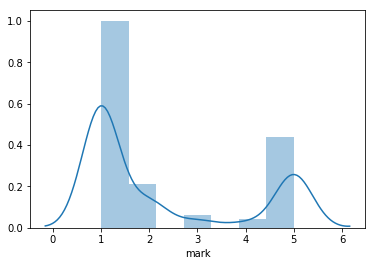

In [8]:
sns.distplot(df_not_null['mark'])
plt.show()

In [9]:
df_not_null.loc[df_not_null['mark'] < 3, 'mark'] = 0
df_not_null.loc[df_not_null['mark'] >= 3, 'mark'] = 1
df_not_null.head()

,mark,text,url
0,1.0,"Ставлю оценку отлично, так как банк является с...",https://www.banki.ru/services/responses/bank/r...
1,1.0,Пару месяцев назад мне понадобилось 140-150 т....,https://www.banki.ru/services/responses/bank/r...
2,0.0,Разочарованы работой банка Тинькофф Бизнес.,https://www.banki.ru/services/responses/bank/r...
3,0.0,В одностороннем порядке повысили лимит кредитк...,https://www.banki.ru/services/responses/bank/r...
4,0.0,Дорогой Ситибанк!,https://www.banki.ru/services/responses/bank/r...


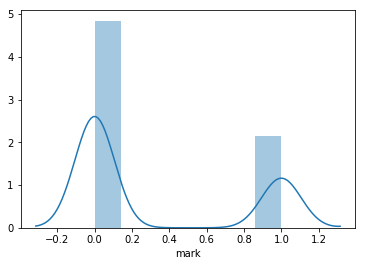

In [10]:
sns.distplot(df_not_null['mark'])
plt.show()

In [11]:
df_not_null.to_csv('review_data.csv', index=False)